In [1]:
import tensorflow as tf
import os
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir = '/content/drive/My Drive/dataset/'

#Directories for each class
train_dir = f'{base_dir}/train'
validation_dir = f'{base_dir}/valid'

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

# YOUR IMAGE SIZE SHOULD BE 150x150
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1./255)

# Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=16,
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))


Found 350 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(521, activation='relu',),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 128)      

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
       if logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84 and logs.get('loss') < 0.7 and logs.get('val_loss') < 0.7:
            print("\nReached 85% accuracy, stopping training!")
            self.model.stop_training = True

callbacks = myCallback()

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.compile(optimizer=RMSprop(learning_rate=0.0005),
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

In [14]:
history = model.fit(
              train_generator,
              validation_data=validation_generator,
              epochs=200,
              verbose=1,
              callbacks=[callbacks]
          )

Epoch 1/200
11/11 [==============================] - 211s 21s/step - loss: 1.6114 - accuracy: 0.2714 - val_loss: 1.5929 - val_accuracy: 0.3600
Epoch 2/200
11/11 [==============================] - 32s 3s/step - loss: 1.5840 - accuracy: 0.3257 - val_loss: 1.5457 - val_accuracy: 0.5200
Epoch 3/200
11/11 [==============================] - 32s 3s/step - loss: 1.5084 - accuracy: 0.4343 - val_loss: 1.3776 - val_accuracy: 0.5000
Epoch 4/200
11/11 [==============================] - 32s 3s/step - loss: 1.2982 - accuracy: 0.4800 - val_loss: 1.1130 - val_accuracy: 0.6300
Epoch 5/200
11/11 [==============================] - 35s 3s/step - loss: 1.1532 - accuracy: 0.4686 - val_loss: 1.0187 - val_accuracy: 0.6400
Epoch 6/200
11/11 [==============================] - 42s 4s/step - loss: 1.1139 - accuracy: 0.4743 - val_loss: 1.0418 - val_accuracy: 0.5900
Epoch 7/200
11/11 [==============================] - 32s 3s/step - loss: 1.1323 - accuracy: 0.4914 - val_loss: 1.0391 - val_accuracy: 0.5200
Epoch 8/200

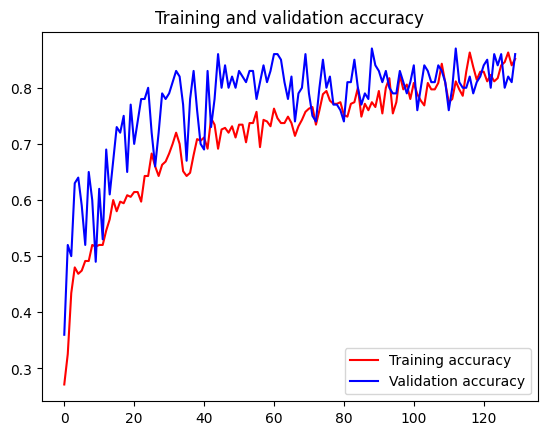

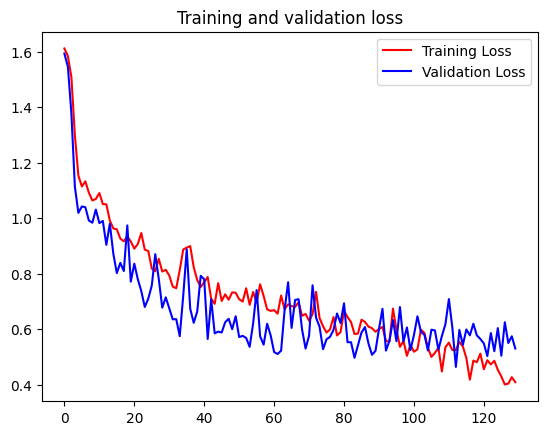

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image
import io

def preprocess_image(uploaded_file):
    img = Image.open(uploaded_file)
    img = img.resize((150, 150))  # Resize the image to 150x150 pixels
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array /= 255.0  # Normalize the image array
    return img_array



In [17]:
def make_prediction(uploaded_file):
    img_array = preprocess_image(uploaded_file)
    prediction = model.predict(img_array)
    return prediction

In [18]:
def display_calories(predicted_class):
    food_item = class_labels[predicted_class]
    calorie_count = calories[food_item]
    print(f'The predicted food is {food_item} with approximately {calorie_count} calories per 100g.')

Saving images10_jpg.rf.08ef652730d7fb669fb933533328436d.jpg to images10_jpg.rf.08ef652730d7fb669fb933533328436d.jpg


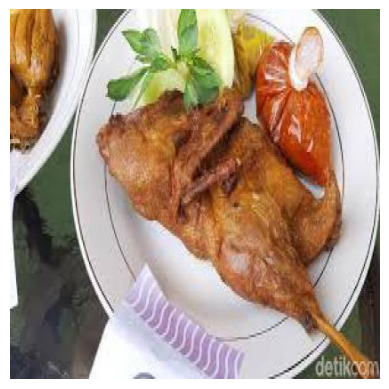

1/1 [==============================] - 0s 230ms/step
The image is predicted to be ayam with a confidence of 0.81
The predicted food is ayam with approximately 239 calories per 100g.


In [19]:
# Define the class labels
class_labels = ['ayam', 'kentang goreng', 'nasi', 'pisang', 'tahu', 'telur', 'tempe']
calories = {
    'ayam': 239,  # calories per 100g
    'kentang goreng': 312,  # calories per 100g
    'nasi': 130,  # calories per 100g
    'pisang': 89,  # calories per 100g
    'tahu': 76,   # calories per 100g
    'telur': 155, # calories per 100g
    'tempe': 192  # calories per 100g
}

# Upload a file
uploaded = files.upload()

for file_name in uploaded.keys():
    # Open and display the image
    uploaded_file = io.BytesIO(uploaded[file_name])
    img = Image.open(uploaded_file)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Make a prediction
    prediction = make_prediction(uploaded_file)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Display the prediction
    print(f'The image is predicted to be {class_labels[predicted_class]} with a confidence of {confidence:.2f}')
    display_calories(predicted_class)


In [20]:
# The code below is to save your model as a .h5 file.
model.save("model_food_detection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model in the SavedModel format
#model.save("model_food_detection_savedmodel", save_format="tf")
# Save the model in the SavedModel format
#model.save("model_food_detection_savedmodel")


# Ensure TensorFlow.js is installed
!pip install tensorflowjs

# Convert the SavedModel to TensorFlow.js format
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model ./model_food_detection_savedmodel ./model_food_detection_js

2024-06-06 17:40:53.320076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-06 17:40:55.282084: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


In [ ]:
#import time
#saved_model_path = "./model_food_detection.h5".format(int(time.time()))

#model.save(saved_model_path)

In [ ]:
#!pip install tensorflowjs

#!tensorflowjs_converter --input_format=keras {saved_model_path} ./